# Logistic Regression

Visualization of the prediction manifold and separating plane for a linear separator.

For this visualization we work with a dataset of two features and one class variable.
First, let us generate the data:

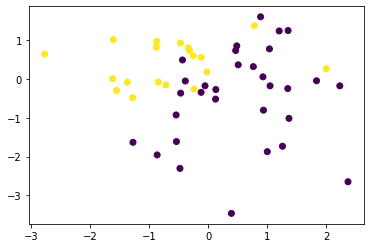

In [21]:
import numpy as np
import matplotlib.pyplot as pp

n = 50 # Number of instances

data = np.random.normal(size = (n, 2))

target = np.random.binomial(1, 1 / (1 + np.exp( 1 + 3*data[:,0] - 4*data[:,1] ) ) )

pp.scatter( x=data[:,0], y=data[:,1], c=target )

Next, let us learn a logistic regression classifier for this data:

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='none').fit(data, target)
predictions = lr.predict_proba(data)

(lr.intercept_, lr.coef_)

(array([-0.88203625]), array([[-2.4031328,  2.0582838]]))

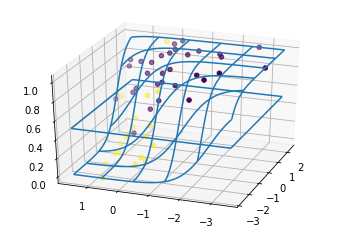

In [84]:
from mpl_toolkits.mplot3d import Axes3D # noqa: F401 unused import

grids = np.mgrid[np.min(data[:,0]):np.max(data[:,0]):50j, np.min(data[:,1]):np.max(data[:,1]):50j]
pred_surface = lr.predict_proba(grids.reshape(2,2500).transpose())[:,0].reshape(50,50)
decision_surface = np.tile(0.5, (50, 50))

fig = pp.figure()
ax = fig.add_subplot(111, projection='3d', azim=200)

ax.plot_wireframe(grids[0], grids[1], pred_surface, rstride=10, cstride=10)
ax.plot_wireframe(grids[0], grids[1], decision_surface, rstride=50, cstride=50)
ax.scatter(data[:,0], data[:,1], predictions[:,0], c=target) # Data on prediction surface


pp.show()

In [85]:
# TODO: Add other angles